### Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model
from sklearn.model_selection import train_test_split
from sklearn import linear_model

### Importar el dataset


In [ ]:
data_old = pd.read_excel('RealEstateValuation.xlsx')
data = data_old.drop(['No'], axis =1)
print(data.shape)
data.head(10)

(414, 7)


,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1
5,2012.666667,7.1,2175.03000,3,24.96305,121.51254,32.1
6,2012.666667,34.5,623.47310,7,24.97933,121.53642,40.3
7,2013.416667,20.3,287.60250,6,24.98042,121.54228,46.7
8,2013.500000,31.7,5512.03800,1,24.95095,121.48458,18.8
9,2013.416667,17.9,1783.18000,3,24.96731,121.51486,22.1


In [ ]:
data.describe()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148953,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281995,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.916667,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.416667,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [ ]:
data.columns = ['Transaction date', 'House age', 'Distance MRT station', 'Number of convenience stores', 'Latitude', 'Longitude', 'House price of unit area']
data.head(10)

,Transaction date,House age,Distance MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1
5,2012.666667,7.1,2175.03000,3,24.96305,121.51254,32.1
6,2012.666667,34.5,623.47310,7,24.97933,121.53642,40.3
7,2013.416667,20.3,287.60250,6,24.98042,121.54228,46.7
8,2013.500000,31.7,5512.03800,1,24.95095,121.48458,18.8
9,2013.416667,17.9,1783.18000,3,24.96731,121.51486,22.1


### Verificación de valores nulos

In [ ]:
data.isnull().sum()

Transaction date                0
House age                       0
Distance MRT station            0
Number of convenience stores    0
Latitude                        0
Longitude                       0
House price of unit area        0
dtype: int64

array([[<AxesSubplot:title={'center':'Transaction date'}>,
        <AxesSubplot:title={'center':'House age'}>,
        <AxesSubplot:title={'center':'Distance MRT station'}>],
       [<AxesSubplot:title={'center':'Number of convenience stores'}>,
        <AxesSubplot:title={'center':'Latitude'}>,
        <AxesSubplot:title={'center':'Longitude'}>],
       [<AxesSubplot:title={'center':'House price of unit area'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

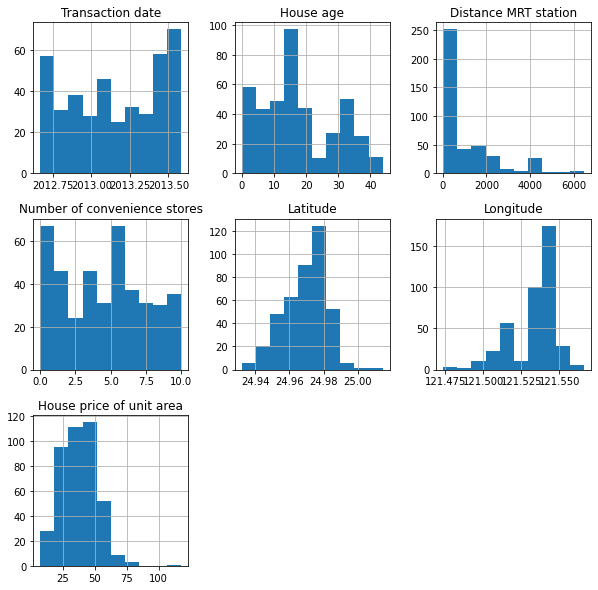

In [ ]:
data.hist(figsize=(10,10))

### Normalización de los datos

In [ ]:
def normalizar(x,xmax,xmin,ymax,ymin):
  m = (ymax-ymin)/(xmax-xmin)
  b = ymin - m*xmin

  y = m*x + b

  return y

In [ ]:
max = np.max(data).values
min = np.min(data).values
data2 = normalizar(data,max,min,1,-1)
data2.head(10)

,Transaction date,House age,Distance MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
0,-0.454545,0.461187,-0.980975,1.0,0.233883,0.438646,-0.448590
1,-0.454545,-0.109589,-0.912381,0.8,0.169898,0.422903,-0.370337
2,1.000000,-0.392694,-0.833370,0.0,0.342462,0.517792,-0.277525
3,0.818182,-0.392694,-0.833370,0.0,0.342462,0.517792,-0.141037
4,-0.636364,-0.771689,-0.886402,0.0,0.146389,0.486306,-0.353958
5,-1.000000,-0.675799,-0.334333,-0.4,-0.249152,-0.158723,-0.554140
6,-1.000000,0.575342,-0.814347,0.4,0.145419,0.356265,-0.404914
7,0.636364,-0.073059,-0.918257,0.2,0.171837,0.482640,-0.288444
8,0.818182,0.447489,0.698055,-0.8,-0.542414,-0.761699,-0.796178
9,0.636364,-0.182648,-0.455562,-0.4,-0.145904,-0.108691,-0.736124


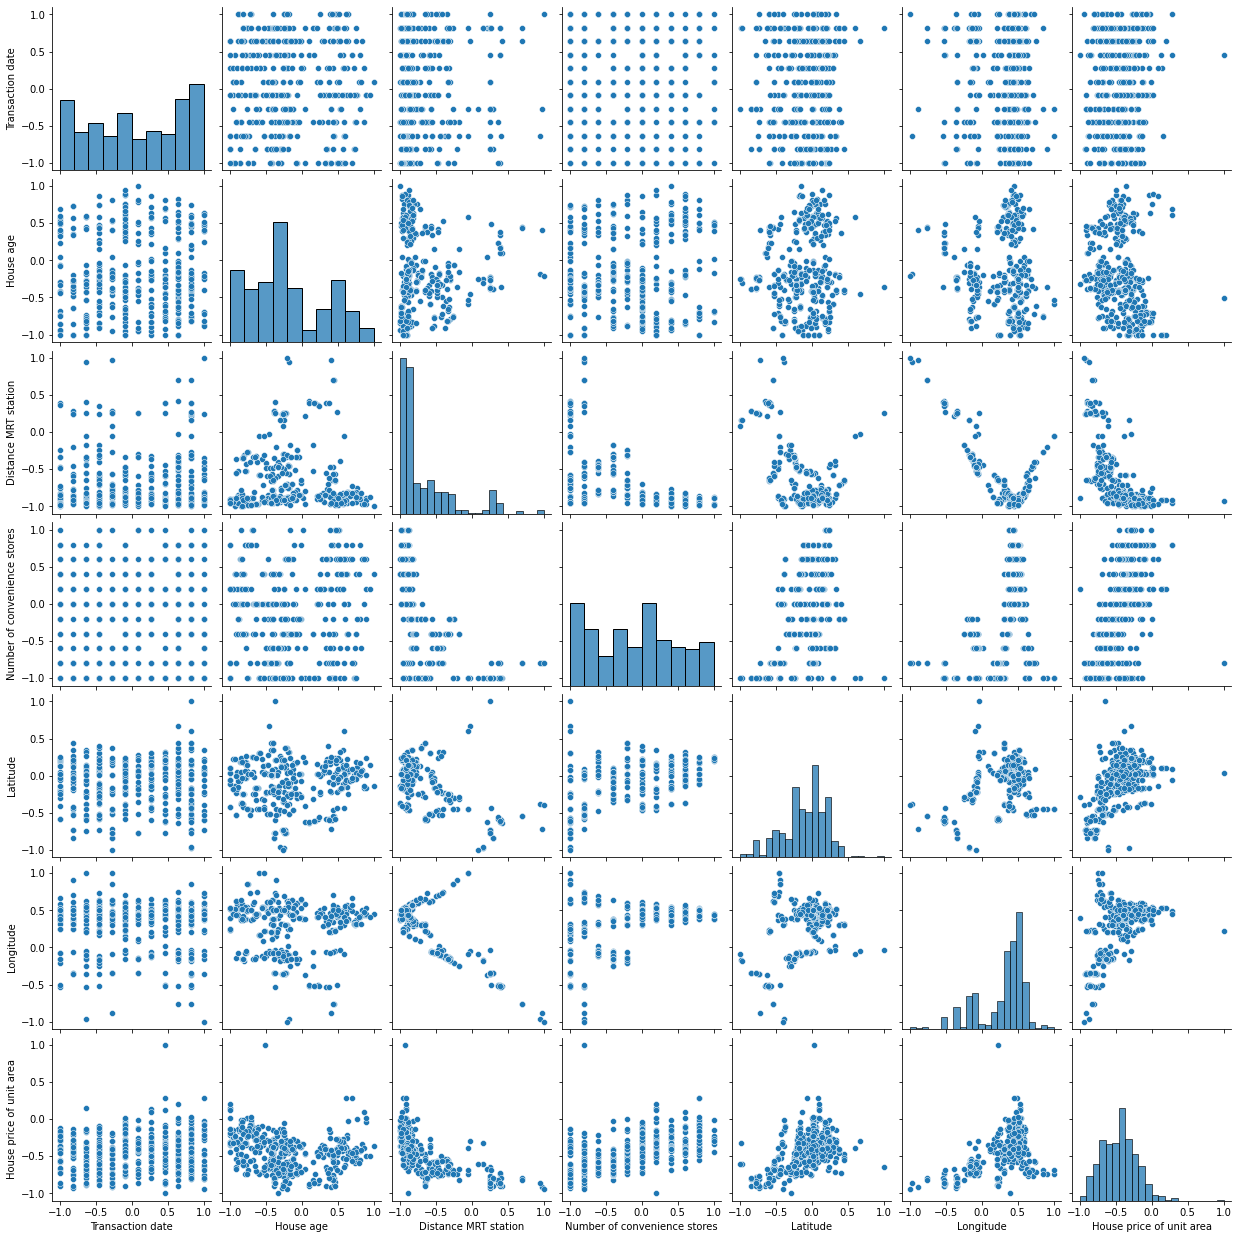

In [ ]:
sn.pairplot(data2)

In [ ]:
corr = data2.corr()
print(corr)

                              Transaction date  House age  \
Transaction date                      1.000000   0.017542   
House age                             0.017542   1.000000   
Distance MRT station                  0.060880   0.025622   
Number of convenience stores          0.009544   0.049593   
Latitude                              0.035016   0.054420   
Longitude                            -0.041065  -0.048520   
House price of unit area              0.087529  -0.210567   

                              Distance MRT station  \
Transaction date                          0.060880   
House age                                 0.025622   
Distance MRT station                      1.000000   
Number of convenience stores             -0.602519   
Latitude                                 -0.591067   
Longitude                                -0.806317   
House price of unit area                 -0.673613   

                              Number of convenience stores  Latitude  \
Transa

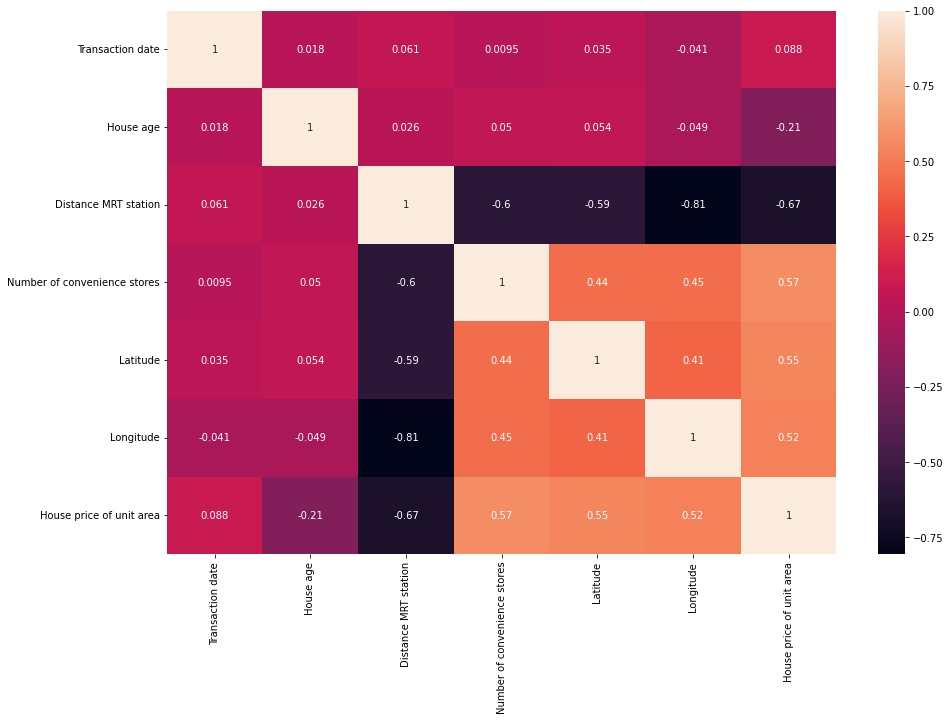

In [ ]:
plt.figure(figsize=(15,10))
sn.heatmap(corr, annot=True)
plt.show()

### Separación de datos de entrenamiento y validación

In [ ]:
target = data2['House price of unit area'].values
data3 = data2.drop(['House price of unit area'], axis = 1)

print(target.shape)
print(data3.shape)

(414,)
(414, 6)


In [ ]:
seed = 20

x_train, x_test, y_train, y_test = train_test_split(data3, target, test_size=0.1, random_state=seed)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(372, 6)
(372,)
(42, 6)
(42,)


In [ ]:
input_dim = x_train.shape[1]
num_clases = 1
lr = 0.008
loss = 'mse'#'mean_squared_error'

### Arquitectura del modelo

In [ ]:
def model():
  model = Sequential()
  model.add(Dense(12, input_dim = input_dim, activation = 'tanh'))
  model.add(Dense(5, activation = 'tanh'))
  model.add(Dense(num_clases, activation = 'linear'))

  model.summary()

  opt = tf.keras.optimizers.SGD(learning_rate = lr)

  model.compile(loss = loss, optimizer = opt)

  return model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                84        
                                                                 
 dense_1 (Dense)             (None, 5)                 65        
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
Total params: 155
Trainable params: 155
Non-trainable params: 0
_________________________________________________________________


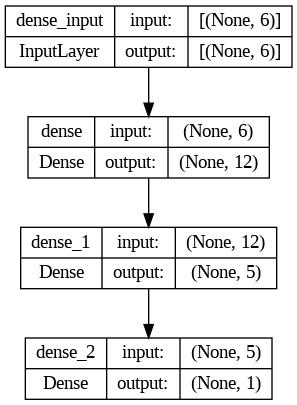

In [ ]:
model = model()
plot_model(model, to_file='model.jpg', show_shapes = True)

### Entrenamiento del modelo

In [ ]:
loss = []
loss_val = []
epochs = 1

In [ ]:
history = model.fit(x_train,y_train, validation_data=(x_test,y_test), epochs=1, batch_size=20, verbose = 0)

loss.append(history.history['loss'][0])
loss_val.append(history.history['val_loss'][0])

print('Epoch: ',epochs,'loss:',loss[epochs-1], 'val_loss:',loss_val[epochs-1])

epochs += 1

while loss_val[len(loss_val)-1] > 0.01: #  Se compara el varlo de la última posición de loss_val
  history = model.fit(x_train,y_train, validation_data=(x_test,y_test), epochs=1, batch_size=20, verbose=0)
  loss.append(history.history['loss'][0])
  loss_val.append(history.history['val_loss'][0])
  print('Epoch: ',epochs,'loss:',loss[epochs-1], 'val_loss:',loss_val[epochs-1])
  epochs += 1

Epoch:  1 loss: 0.18504048883914948 val_loss: 0.09587684273719788
Epoch:  2 loss: 0.10382308810949326 val_loss: 0.06499070674180984
Epoch:  3 loss: 0.07493700087070465 val_loss: 0.050025053322315216
Epoch:  4 loss: 0.059164561331272125 val_loss: 0.0420609749853611
Epoch:  5 loss: 0.04958197474479675 val_loss: 0.03688685595989227
Epoch:  6 loss: 0.04358850046992302 val_loss: 0.034095410257577896
Epoch:  7 loss: 0.03982767090201378 val_loss: 0.03246733546257019
Epoch:  8 loss: 0.037436120212078094 val_loss: 0.031076256185770035
Epoch:  9 loss: 0.03573200851678848 val_loss: 0.030642194673419
Epoch:  10 loss: 0.03460758924484253 val_loss: 0.030085546895861626
Epoch:  11 loss: 0.03375980257987976 val_loss: 0.02971411868929863
Epoch:  12 loss: 0.03324871137738228 val_loss: 0.02928030863404274
Epoch:  13 loss: 0.0327773354947567 val_loss: 0.02875959500670433
Epoch:  14 loss: 0.032443322241306305 val_loss: 0.02855033613741398
Epoch:  15 loss: 0.032147232443094254 val_loss: 0.028304386883974075

KeyboardInterrupt: ignored

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)

print(score)

0.01286641787737608


### Gráfica Epochs vs Loss


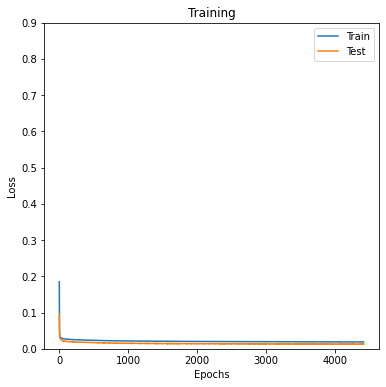

In [ ]:
plt.figure(figsize=(6,6))
plt.plot(loss)
plt.plot(loss_val)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train','Test'])
plt.title('Training')
plt.ylim([0, 0.9])
plt.show()

In [ ]:
outputTest = model.predict(x_test)
print(outputTest.shape)

2/2 [==============================] - 0s 5ms/step
(42, 1)


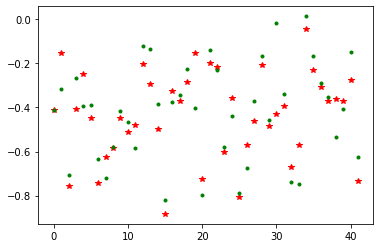

In [ ]:
plt.figure()
plt.plot(outputTest, '*r',y_test, '.g')

(42, 1)
(42, 1)
Coeficiente:  0.7692126211101005


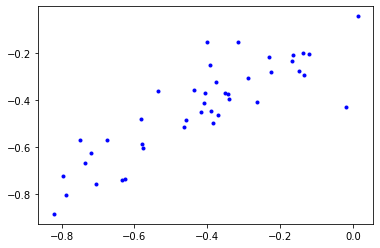

In [ ]:
output = outputTest
target = y_test.reshape(42,1)

print(output.shape)
print(target.shape)

regr = linear_model.LinearRegression()

regr.fit(target, output)

coef = regr.coef_

print('Coeficiente: ', coef[0][0])

plt.figure()
plt.plot(y_test, outputTest, '.b')